## Train a model with Mushroom data using XGBoost algorithm
###  Model is trained with XGBoost installed in notebook instance
###  In the later examples, we will train using SageMaker's XGBoost algorithm

In [1]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!conda install -y -c conda-forge xgboost

done

# All requested packages already installed.



In [2]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import preprocessing

In [3]:
column_list_file = 'mushroom_train_column_list.txt'
train_file = 'mushroom_train.csv'
validation_file = 'mushroom_validation.csv'

In [4]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [5]:
columns

['class_edible',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [6]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [7]:
df_train.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,0,1,2,1,0,0,3,...,0,7,7,0,2,1,4,1,3,1
1,1,3,3,4,0,7,1,0,1,0,...,1,6,6,0,2,1,0,7,4,0
2,1,2,3,9,0,2,1,0,0,2,...,1,6,6,0,2,1,2,1,4,1
3,0,0,3,8,1,0,1,0,0,10,...,2,7,7,0,2,1,4,2,2,3
4,0,5,3,2,1,5,1,0,0,7,...,2,6,3,0,2,1,4,2,4,0


In [8]:
df_validation.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,0,8,0,5,1,1,0,7,...,2,7,7,0,2,1,0,2,0,1
1,0,5,2,3,0,5,1,1,0,5,...,2,7,7,0,2,1,0,3,3,1
2,0,5,0,8,0,5,1,1,0,4,...,2,7,7,0,2,1,0,2,0,1
3,0,5,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,4,2
4,0,5,3,3,1,5,1,0,0,5,...,2,6,6,0,2,1,4,3,5,0


In [9]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [10]:
# Launch a classifier
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
classifier = xgb.XGBClassifier (objective='binary:logistic',n_estimators=50)

In [11]:
classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [12]:
classifier.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)], eval_metric=['logloss'])

[0]	validation_0-logloss:0.610494	validation_1-logloss:0.611318
[1]	validation_0-logloss:0.542749	validation_1-logloss:0.544329
[2]	validation_0-logloss:0.486324	validation_1-logloss:0.488569
[3]	validation_0-logloss:0.438525	validation_1-logloss:0.440461
[4]	validation_0-logloss:0.397609	validation_1-logloss:0.400041
[5]	validation_0-logloss:0.362406	validation_1-logloss:0.365305
[6]	validation_0-logloss:0.331748	validation_1-logloss:0.334258
[7]	validation_0-logloss:0.301364	validation_1-logloss:0.303455
[8]	validation_0-logloss:0.274899	validation_1-logloss:0.276645
[9]	validation_0-logloss:0.251852	validation_1-logloss:0.253199
[10]	validation_0-logloss:0.231697	validation_1-logloss:0.232743
[11]	validation_0-logloss:0.21465	validation_1-logloss:0.216294
[12]	validation_0-logloss:0.199659	validation_1-logloss:0.201666
[13]	validation_0-logloss:0.182005	validation_1-logloss:0.184339
[14]	validation_0-logloss:0.166673	validation_1-logloss:0.169211
[15]	validation_0-logloss:0.153101	v

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [13]:
eval_result = classifier.evals_result()

In [14]:
training_rounds = range(len(eval_result['validation_0']['logloss']))

In [15]:
print(training_rounds)

range(0, 50)


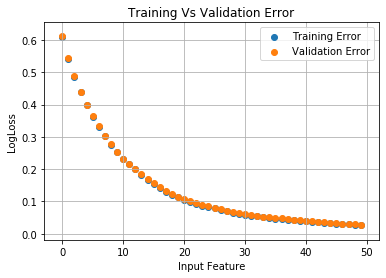

In [16]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['logloss'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['logloss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('LogLoss')
plt.title('Training Vs Validation Error')
plt.legend()

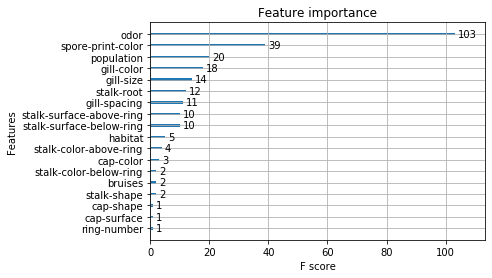

In [17]:
xgb.plot_importance(classifier)

In [18]:
df = pd.read_csv('mushroom_encoded_all.csv')

In [19]:
df.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [20]:
X_test = df.iloc[:,1:]
print(X_test[:5])

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2                       7

In [21]:
result = classifier.predict(X_test)

In [22]:
result[:5]

array([1, 0, 0, 1, 0])

In [23]:
df['predicted_class'] = result

In [24]:
df.class_edible = df.class_edible.map({0:'edible',1:'poisonous'})

In [25]:
df.predicted_class = df.predicted_class.map({0:'edible',1:'poisonous'})

In [26]:
df.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,predicted_class
0,poisonous,5,2,4,1,6,1,0,1,4,...,7,7,0,2,1,4,2,3,5,poisonous
1,edible,5,2,9,1,0,1,0,0,4,...,7,7,0,2,1,4,3,2,1,edible
2,edible,0,2,8,1,3,1,0,0,5,...,7,7,0,2,1,4,3,2,3,edible
3,poisonous,5,3,8,1,6,1,0,1,5,...,7,7,0,2,1,4,2,3,5,poisonous
4,edible,5,2,3,0,5,1,1,0,4,...,7,7,0,2,1,0,3,0,1,edible


In [27]:
df.class_edible.value_counts()

edible       4208
poisonous    3916
Name: class_edible, dtype: int64

In [28]:
df.predicted_class.value_counts()

edible       4264
poisonous    3860
Name: predicted_class, dtype: int64

In [29]:
print('Confusion matrix - Actual versus Predicted')
pd.crosstab(df['class_edible'], df['predicted_class'])

Confusion matrix - Actual versus Predicted


predicted_class,edible,poisonous
class_edible,,
edible,4208,0
poisonous,56,3860


In [30]:
import sklearn.metrics as metrics
print(metrics.classification_report(df['class_edible'], df['predicted_class']))

precision    recall  f1-score   support

      edible       0.99      1.00      0.99      4208
   poisonous       1.00      0.99      0.99      3916

    accuracy                           0.99      8124
   macro avg       0.99      0.99      0.99      8124
weighted avg       0.99      0.99      0.99      8124

